In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count', 'availability',
       'number_of_reviews_ltm', 'license;'],
      dtype='object')

# Q1 - What is the number of available rooms by each type ?

In [4]:
def rooms_availability(df) :
    available_rooms = df.groupby('room_type')['availability'].count()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(available_rooms.index , available_rooms.values , color = colors)
    plt.xlabel('Room Type')
    plt.ylabel('Available Rooms')
    plt.title('Number of Available Rooms by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:0.0f} room',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

## Insights :
### - This chart showcases the number of available rooms for each room type (e.g., entire home/apt, private room, shared room, etc.).
### - It provides an overview of the distribution of available rooms among different types.

## Benefits :
### - Decision-makers can assess the supply of each room type and gain insights into the demand for different accommodation options.
### - It helps in understanding the overall availability of rooms and identifying any imbalances or shortages in specific room types.

## Useful Information :
### - The chart displays the count of available rooms on the y-axis, while the x-axis represents different room types.
### - Each bar represents a room type, and the height of the bar corresponds to the count of available rooms for that type.

# Q2 - What is the average price for each room ?

In [5]:
def average_price(df) : 
    avg = df.groupby('room_type')['price'].mean()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(avg.index , avg.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Average Price')
    plt.title('Average Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

## Insights :
### - This chart illustrates the average price for each room type.
### - It provides a comparison of the pricing levels across different types of accommodations.

## Benefits :
### - Decision-makers can understand the average prices offered in the market for each room type.
### - It helps in identifying the room types that command higher or lower prices, enabling effective pricing strategies.

## Useful Information :
### - The chart displays the average price on the y-axis, while the x-axis represents different room types.
### - Each bar represents a room type, and the height of the bar corresponds to the average price for that type.



# Q3 - What is the highest price for each room ?

In [6]:
def highest_price(df) : 
    highest = df.groupby('room_type')['price'].max()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(highest.index , highest.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Max Price')
    plt.title('Maximum Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:0.0f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()


## Insights :
### - This chart showcases the highest price observed for each room type.
### - It highlights the upper range of prices for different types of accommodations.

## Benefits :
### - Decision-makers can understand the maximum price points for each room type, which can guide their pricing strategies and positioning in the market.
### - It helps in identifying the room types that have the potential for higher revenue generation.

## Useful Information :
### - The chart displays the maximum price on the y-axis, while the x-axis represents different room types.
### - Each bar represents a room type, and the height of the bar corresponds to the highest price observed for that type.



# Q4 - What is the lowest price for each room ?

In [7]:
def lowest_price(df) : 
    lowest = df.groupby('room_type')['price'].min()
    plt.figure(figsize=(6,6))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(lowest.index , lowest.values, color=colors)
    plt.xlabel('Room Type')
    plt.ylabel('Min Price')
    plt.title('Minimum Price by Room Type')
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'${height:0.0f}',xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

## Insights :
### - This chart showcases the lowest price observed for each room type.
### - It highlights the lower range of prices for different types of accommodations.

## Benefits :
### - Decision-makers can understand the minimum price points for each room type, which can help in setting competitive pricing strategies and identifying affordable options for customers.
### - It provides insights into the price range that customers can expect for different types of accommodations.

## Useful Information :
### - The chart displays the minimum price on the y-axis, while the x-axis represents different room types.
### - Each bar represents a room type, and the height of the bar corresponds to the lowest price observed for that type.



# Q5 - What are available neighbourhood and count of them ?

In [8]:
def neighbourhood_count(df) :
    neighbourhood = df['neighbourhood'].value_counts()
    plt.figure(figsize=(8,8))
    colors = ['skyblue' , 'salmon' , 'orange' , 'darkseagreen' ,'cadetblue']
    bars = plt.bar(neighbourhood.index , neighbourhood.values , color=colors )
    plt.xlabel('Neighborhood')
    plt.ylabel('Listing Count')
    plt.title('Number of Listings by Neighborhood')
    plt.xticks(rotation=90)
    for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height:0.0f}',xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')
    plt.show()

## Insights :
### - This chart displays the number of listings available in each neighborhood.
### - It provides an overview of the distribution of listings across different neighborhoods.

## Benefits :
### - Decision-makers can identify the popular neighborhoods with a higher number of listings, indicating potential areas of higher demand or investment opportunities.
### - It helps in understanding the availability of accommodations in different neighborhoods, allowing customers to make informed decisions.

## Useful Information :
### - The chart displays the count of listings on the y-axis, while the x-axis represents different neighborhoods.
### - Each bar represents a neighborhood, and the height of the bar corresponds to the number of listings in that neighborhood.


### Data Cleaning :

In [9]:
def clean_missing_data(df):
    missing_columns_values = df.columns[df.isnull().any()]
    for column in missing_columns_values:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna('Unknown')
        elif df[column].dtype == 'bool':
            df[column] = df[column].fillna(False)
        else:
            df[column] = df[column].fillna(df[column].mean())

### Check file is in the types range or not :

In [10]:
def get_file_types(file_type):
    while True :
        file_path = input('Please enter your file path : ')
        if file_path.endswith(tuple(file_type)):
            return file_path
        else :
            print('Please enter a valid path from this range {}'.format(file_type))

### Check every file Path :

In [11]:
def check_file_path(file_path):
    
    if file_path.endswith('csv'):
        df = pd.read_csv(file_path.strip())
        
    elif file_path.endswith('xlsx'):
        df = pd.read_excel(file_path.strip())
        
    elif file_path.endswith('sql'):
        df = pd.read_sql(file_path.strip())
        
    return df

### Code runs here :

Please enter your file path : listings.csv


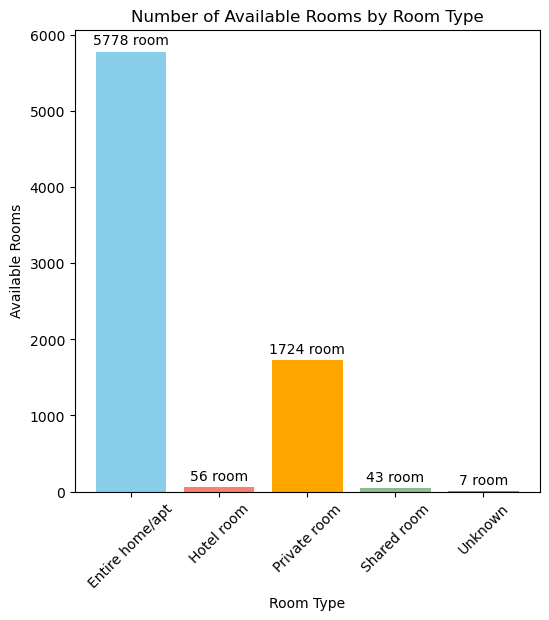

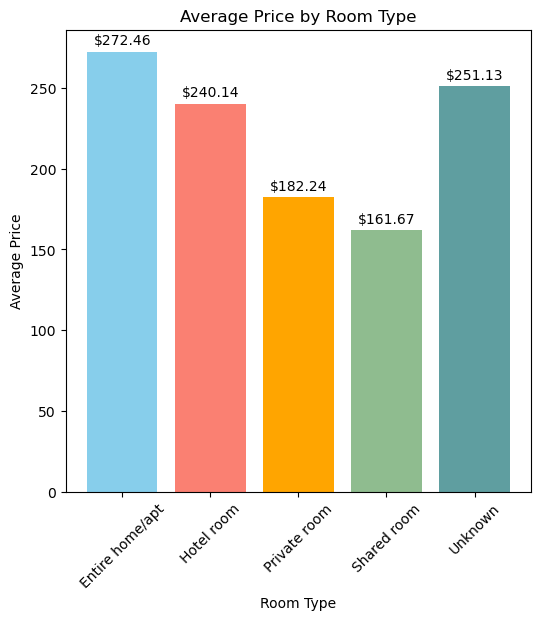

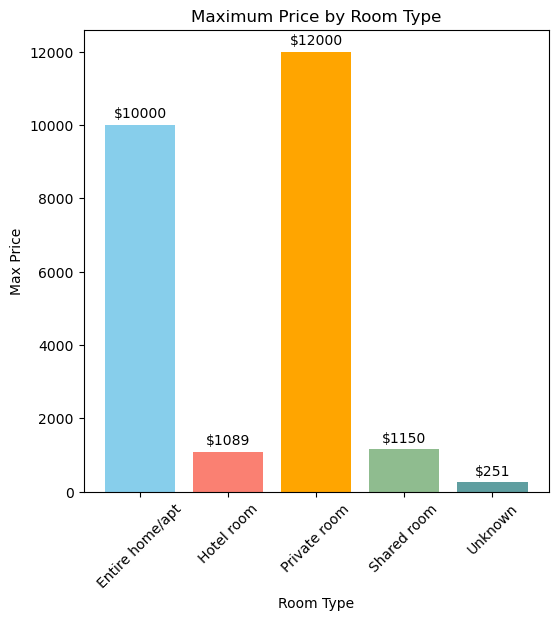

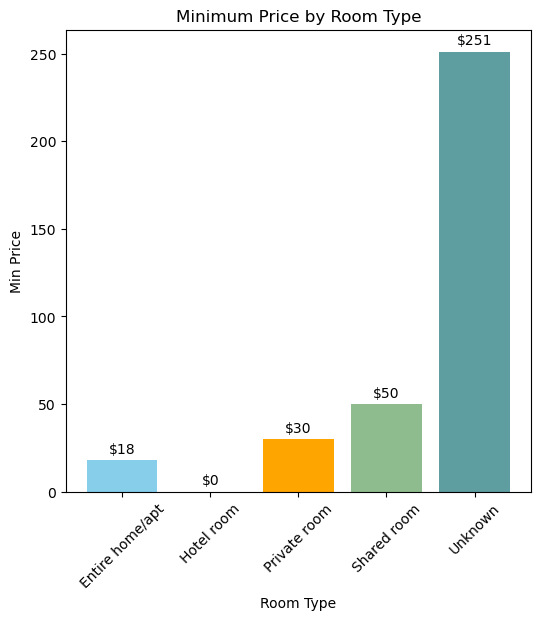

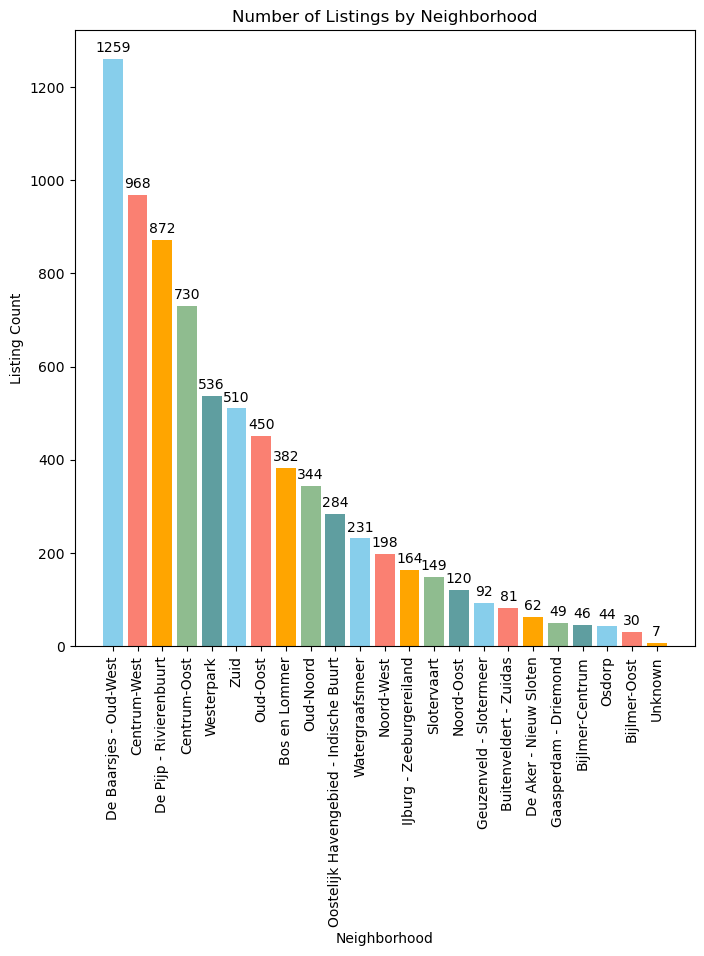

In [12]:
def main():
    file_type = ['.csv','.xlsx','.sql']
    file_path = get_file_types(file_type)
    df = check_file_path(file_path)
    clean_missing_data(df)
    rooms_availability(df)
    average_price(df)
    highest_price(df)
    lowest_price(df)
    neighbourhood_count(df)
if __name__ == "__main__":
    main()

# Aggregation of all  Insights & Recommendations :

## 1 - Insights :

### - The number of available rooms varies by room type, with entire homes/apartments being the most common, followed by private rooms and shared rooms.
### - The average price per night also differs by room type, with entire homes/apartments having the highest average price, followed by private rooms and shared rooms.
### - The highest and lowest prices are observed to vary by room type, with entire homes/apartments generally having the highest prices and shared rooms having the lowest prices.
### - The availability of rooms and their prices provide insights into market demand and potential revenue streams.
### - The distribution of listings across neighborhoods can help identify popular areas and potential opportunities for expansion or targeted marketing.

# ---------------------------------------------------------------------------
## 2 - Recommendations for decision-makers :

### - Assess the demand for different room types and tailor offerings accordingly. Consider the popularity of entire homes/apartments and private rooms when making pricing and availability decisions.
### - Monitor competitors' pricing strategies to ensure competitiveness while maximizing profitability. Analyze the average and highest prices for each room type to identify potential pricing opportunities.
### - Identify neighborhoods with high listing counts as potential areas for growth or investment. Consider factors such as proximity to attractions, transportation, and amenities when evaluating new locations.
### - Regularly analyze and adapt to market trends. Use the provided visualizations and insights to understand the current state of the market and make data-driven decisions.
### - Leverage customer reviews and feedback to improve offerings and customer satisfaction. Prioritize guest experiences and consider implementing initiatives to enhance overall quality.

